In [1]:
#Import Pandas because I need dataframes
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

In [2]:
#Read in the cleaned data from data_cleaned.csv
# Specify the file path or URL
file_path = "data_cleaned.csv"

# Read the CSV file into a DataFrame
data_cleaned_df = pd.read_csv(file_path)

# Print the DataFrame
data_cleaned_df.head()

,Patient_ID,Appointment_ID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,Scheduled_Day_Date,Scheduled_Hour,Scheduled_Day_of_Week,Scheduled_Month,Appointment_Day_Date,Appointment_Day_of_Week,Appointment_Month,Days_Between,lat,lon
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,...,2016-04-29,18,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-22.788662,-43.079799
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,...,2016-04-29,17,Friday,4,2016-04-29,Friday,4,0,-23.354233,-44.725856
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,...,2016-04-29,16,Friday,4,2016-04-29,Friday,4,0,-23.514826,-46.552112


In [3]:
#We want to analyze the following columns
#Hypertension, Diabetes, Alcoholism, Handicap
print(data_cleaned_df["Hypertension"].value_counts()[0])

88725


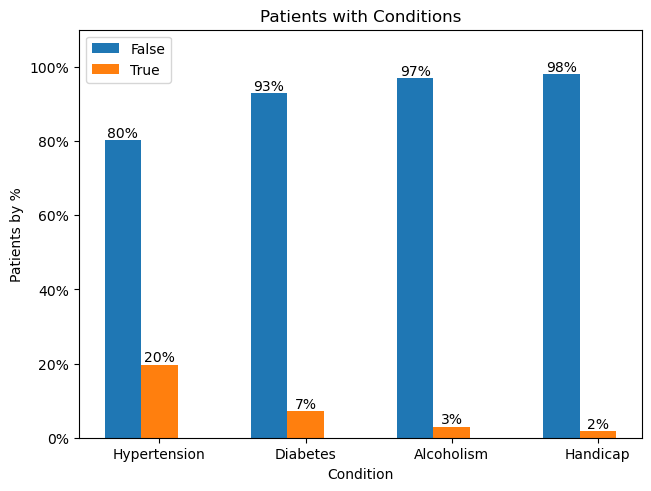

In [4]:
#Trying all 4 on one bar chart
hypertension_false = data_cleaned_df["Hypertension"].value_counts(normalize='True')[0]
hypertension_true = data_cleaned_df["Hypertension"].value_counts(normalize='True')[1]
diabetes_false =  data_cleaned_df["Diabetes"].value_counts(normalize='True')[0]
diabetes_true =  data_cleaned_df["Diabetes"].value_counts(normalize='True')[1]
alcoholism_false = data_cleaned_df["Alcoholism"].value_counts(normalize='True')[0]
alcoholism_true = data_cleaned_df["Alcoholism"].value_counts(normalize='True')[1]
handicap_false = data_cleaned_df["Handicap"].value_counts(normalize='True')[0]
handicap_true = data_cleaned_df["Handicap"].value_counts(normalize='True')[1]
#y_axis = data_cleaned_df["No_Show_Boolean"].map(str)
#print(handicap)

#Round the values for graph
hypertension_false = round(hypertension_false,3)
hypertension_true = round(hypertension_true,3)
diabetes_false =  round(diabetes_false,3)
diabetes_true =  round(diabetes_true,3)
alcoholism_false = round(alcoholism_false,3)
alcoholism_true = round(alcoholism_true,3)
handicap_false = round(handicap_false,3)
handicap_true = round(handicap_true,3)

#Trying to get the values to string, not float
#hypertension_false = str(hypertension_false+'%')

conditions = ('Hypertension','Diabetes','Alcoholism','Handicap')

conditions_dict = {
    'False': (hypertension_false,diabetes_false,alcoholism_false,handicap_false),
    'True': (hypertension_true, diabetes_true, alcoholism_true, handicap_true )
}
x = np.arange(4)
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in conditions_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    
    #Suggested by Copilot
    fmt = '{x:,.0f}%'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)

    # Add percentage values on top of each bar
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '{:.0%}'.format(height), ha='center', va='bottom')
        
    multiplier += 1
    
    
#X ticks for true / false
plt.xticks(x + width, conditions)

plt.title("Patients with Conditions")
plt.ylabel("Patients by %")
plt.xlabel("Condition")

#y ticks thanks Steph
# Change format of yticks to percentages
vals = ax.get_yticks() 
ax.set_yticks(vals)
ax.set_yticklabels(['{:,.0%}'.format(ytick) for ytick in vals])
ax.set_ylim([0,1.1])
ax.legend()

plt.show()
